2536


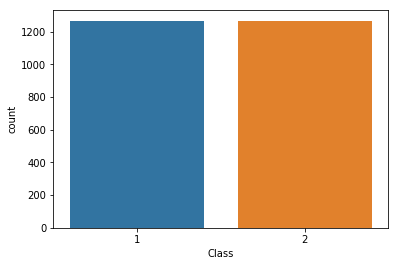

In [27]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression#CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import sklearn as sk
import matplotlib.pyplot as plt
import os
import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split

df = pd.read_csv(os.getcwd()+'/steel_data.csv')

sns.countplot(x="Class", data= df)



df_class1 = df[df.Class==1]
df_class2 = df[df.Class==2]
df_class2_upsampled = sk.utils.resample(df_class2,
                                        replace=True,
                                        n_samples=1268)
df = pd.concat([df_class1, df_class2_upsampled])
print(len(df))
sns.countplot(x="Class", data= df)

df.loc[df['Class'] == 1, 'V34'] = 0
df.loc[df['Class'] == 2, 'V34'] = 1


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-8], df[['V28','V29','V30','V31','V32','V33','V34']] ,test_size=0.3)


#clf.predict([X_test,y_test])

# w = clf.coef_[0]
# print(w)

# a = -w[0] / w[1]

# xx = np.linspace(0,12)
# yy = a * xx - clf.intercept_[0] / w[1]

# h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

# plt.scatter(X[:, 0], X[:, 1], c = y)
# plt.legend()
# plt.show()


Accuracy_Score= 0.7371879106438897
Feature Importances [0.04 0.04 0.04 0.04 0.04 0.02 0.02 0.02 0.04 0.03 0.06 0.02 0.02 0.04
 0.04 0.04 0.04 0.11 0.03 0.03 0.   0.06 0.05 0.03 0.04 0.04 0.02]


<BarContainer object of 27 artists>

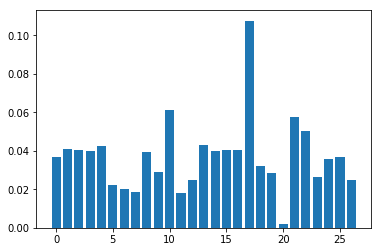

In [56]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)

#clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
#print(y2_predicted,y_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))
print("Feature Importances",clf.feature_importances_)
imp_features=clf.feature_importances_
imp_features=imp_features[:27]
imp_feature_names=X_train.columns[:27]

y_pos=np.arange(len(imp_feature_names))

plt.bar(x=y_pos,height=imp_features,width=0.8)
#plt.xticks(y_pos,imp_feature_names)

In [57]:

clf = LogisticRegression()
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape (1775, 7)

In [85]:
clf= KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))


Accuracy_Score= 0.46254927726675427


In [77]:
sk.metrics.confusion_matrix(y_test,y2_predicted)

ValueError: multilabel-indicator is not supported

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="Red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names=['Class1','Class2']
# Compute confusion matrix
cnf_matrix = sk.metrics.confusion_matrix(y_test, y2_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ValueError: multilabel-indicator is not supported

In [75]:
# PCA + Random forest
dr=PCA(n_components=20)
X_train_reduced=dr.fit_transform(X_train)
X_test_reduced=dr.fit_transform(X_test)

In [69]:

clf = RandomForestClassifier(n_estimators = 10)
#clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_reduced,y_train)
y2_predicted=clf.predict(X_test_reduced)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.21681997371879105


In [38]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,Class,V34
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,1,0.0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,1,0.0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,1,0.0
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,1,0.0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,1,0.0
5,430,441,100250,100337,630,20,87,62357,64,127,...,-0.2267,0.9874,1,0,0,0,0,0,1,0.0
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.2791,1.0000,1,0,0,0,0,0,1,0.0
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.1841,0.3359,1,0,0,0,0,0,1,0.0
8,330,343,429227,429253,264,15,26,29748,53,148,...,-0.1197,0.5593,1,0,0,0,0,0,1,0.0
9,74,90,779144,779308,1506,46,167,180215,53,143,...,-0.0651,1.0000,1,0,0,0,0,0,1,0.0


In [39]:
df.loc[df['Class'] == 2]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,Class,V34
1503,265,297,492514,492654,2293,107,140,217759,82,116,...,-0.2581,1.0000,0,0,0,0,0,0,2,1.0
1549,1199,1207,585934,585950,90,13,16,11422,114,141,...,-0.0085,0.2384,0,0,0,0,0,0,2,1.0
1870,1341,1409,2794140,2794143,173,68,11,21612,65,174,...,-0.0240,0.3419,0,0,0,0,0,0,2,1.0
1558,1392,1415,1215744,1215749,82,23,6,10827,123,141,...,0.0315,0.2230,0,0,0,0,0,0,2,1.0
1527,1705,1713,389963,389978,102,9,15,8359,70,95,...,-0.3598,0.2288,0,0,0,0,0,0,2,1.0
1477,1135,1162,12416454,12416473,305,33,27,34579,80,127,...,-0.1143,0.8030,0,0,0,0,0,0,2,1.0
1752,151,161,2368336,2368345,59,11,9,5637,86,103,...,-0.2536,0.1954,0,0,0,0,0,0,2,1.0
1752,151,161,2368336,2368345,59,11,9,5637,86,103,...,-0.2536,0.1954,0,0,0,0,0,0,2,1.0
1436,345,355,348556,348568,92,16,12,9704,71,132,...,-0.1760,0.2288,0,0,0,0,0,0,2,1.0
1401,1122,1139,2650780,2650795,144,20,16,14169,84,116,...,-0.2313,0.4219,0,0,0,0,0,0,2,1.0


In [40]:
df.loc[df['Class'] == 1, 'V34'] = 0

In [41]:
df.loc[df['Class'] == 2, 'V34'] = 1

In [24]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,Class,V34
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,1,0.0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,1,0.0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,1,0.0
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,1,0.0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,1,0.0
5,430,441,100250,100337,630,20,87,62357,64,127,...,-0.2267,0.9874,1,0,0,0,0,0,1,0.0
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.2791,1.0000,1,0,0,0,0,0,1,0.0
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.1841,0.3359,1,0,0,0,0,0,1,0.0
8,330,343,429227,429253,264,15,26,29748,53,148,...,-0.1197,0.5593,1,0,0,0,0,0,1,0.0
9,74,90,779144,779308,1506,46,167,180215,53,143,...,-0.0651,1.0000,1,0,0,0,0,0,1,0.0


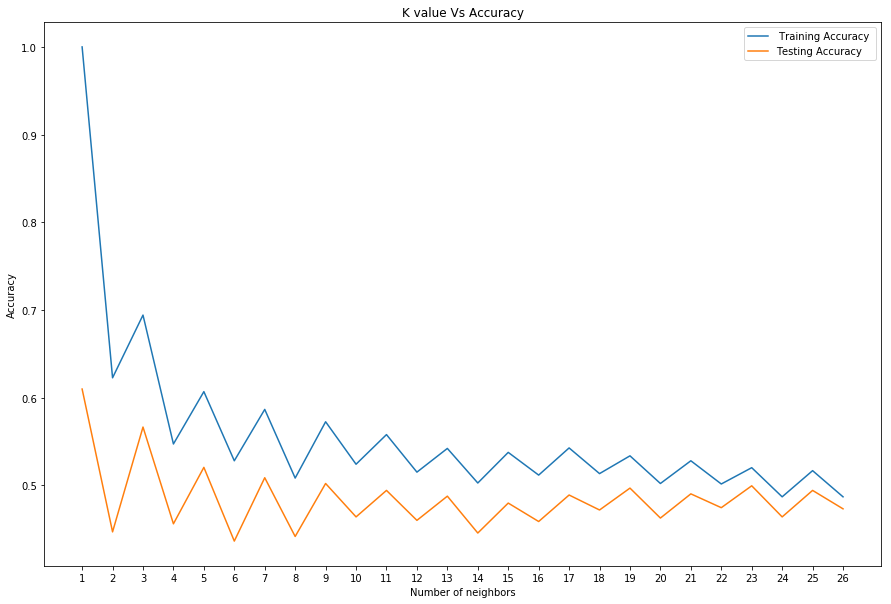

In [70]:
train_accuracy = []
test_accuracy = []

for k in range(1,27):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(range(1,27), train_accuracy, label= " Training Accuracy ")
plt.plot(range(1,27), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(range(1,27))
plt.show()